<a href="https://colab.research.google.com/github/marco-finger/derLauch/blob/main/CodingTask1_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

1. Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
2. Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
3. Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
4.Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
5.Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]


### Task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSF-FS22/data/task1/4ms_10 av_30 s_Absorbance_10-32-04-868.txt'

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv(path, delimiter='\t', header=13) # the \t means tab. The data table starts at line 13
df.to_csv('stripped_data.csv') # save df to a new file

In [ ]:
#df.iloc[0,1780:1950]

### Task 2.1

We simplify the task a little bit and just assumes 7 wavelengths per nm. The number actually vary a bit, from 6-8 or so.

In [ ]:
#df.iloc[0,50:80]

In [ ]:
#%%timeit r=1 
def dfReduce(dfR,n):
  for i in range(0,df.shape[0]):
    s   = 2
    t   = 2
    for j in range(s,df.shape[-1],n):
      if (s+n)>df.shape[-1]: n=df.shape[-1]-s
      sum = 0.0
      for k in range(s,s+n):
        sum+= dfR.iloc[i,k]
      dfR.iloc[i,t]=sum/n
      #print(t,dfR.iloc[i,s])
      s +=n
      t +=1
  return dfR.iloc[:,0:t]
i=7
for fname in ['dfR1.csv']:  # ,'dfR2.csv','dfR3.csv','dfR4.csv']:
  dfR = df.copy()
  dfR = dfReduce(dfR,i)
  i += 7  # About 7 wavelengths per nm
  dfR.to_csv(fname)

KeyboardInterrupt: ignored

###Task 2.2

In [11]:
#%%timeit -r 1
def dfRed(fname,n):
  new_df = df.copy() # make a copy of original df to work on the copy
  new_df = new_df.iloc[:,2:-1] # all the rows, from column 2 to the last
  new_df = new_df.groupby([[i//n for i in range(0,new_df.shape[-1])]], axis = 1).mean()
  new_df.insert(0,'Time', (df.iloc[:,1]-df.iloc[0,1])/1000) # re-inserting time in column 0 from original df
  new_df.to_csv(fname)
  return new_df
for i in range(1,2): dfr = dfRed('dfR'+str(i)+'.csv',i*7)
dfr.head()

,Time,0,1,2,3,4,5,6,7,8,...,511,512,513,514,515,516,517,518,519,520
0,0.000,-0.307607,0.250246,0.053834,0.079881,0.006756,-0.086762,0.218782,-0.087784,-0.119112,...,-0.038515,-0.037525,-0.039704,-0.038559,-0.036160,-0.038786,-0.038321,-0.038449,-0.038463,-0.037402
1,0.089,-0.474918,-0.113307,0.230986,1.314206,-0.022204,0.160432,0.212720,1.769881,-0.118965,...,-0.038367,-0.037653,-0.039198,-0.038041,-0.036795,-0.038581,-0.038353,-0.038536,-0.038209,-0.037716
2,0.173,-0.013433,0.016759,0.173143,-0.425851,0.017977,0.153786,0.111422,-0.181628,-0.316659,...,-0.038272,-0.037762,-0.039670,-0.038185,-0.036674,-0.037635,-0.038082,-0.038195,-0.037433,-0.036989
3,0.257,-0.104049,0.106396,0.121006,-0.224290,0.001273,0.167740,0.333543,0.089858,-0.061849,...,-0.038068,-0.037511,-0.038954,-0.037995,-0.036468,-0.038737,-0.037154,-0.037086,-0.037367,-0.036534
4,0.340,-0.192761,0.088411,-0.026605,-0.097619,-0.105147,0.301079,0.175897,-0.197325,-0.003293,...,-0.038617,-0.037825,-0.039180,-0.038047,-0.036681,-0.038293,-0.038281,-0.038129,-0.037798,-0.038109


### Task 3

0

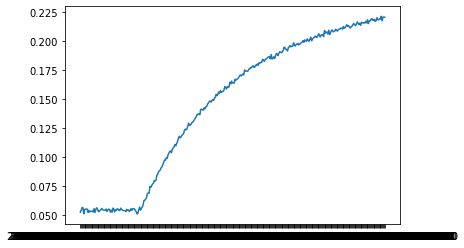

In [12]:
import matplotlib.pyplot as plt
def plotWaveLengthDiff(a,b):
  x = df.iloc[:,0]
  y = -(df.iloc[:,b]-df.iloc[:,a])
  plt.plot(x,y)
  return 0
# I give column numbers instead of wavelengths, i.e. instead of column names
plotWaveLengthDiff(1750,1950)

### Task 4

In [14]:
b = 1950
a = 1750
for i in [1,7,14,21,28]:
  df1 = dfRed('dfR1.csv',i)
x = df1.iloc[:,0]
y = -(df1.iloc[:,b]-df1.iloc[:,a])
plt.plot(x,y,c='r',label='redline')
plt.xlabel('Time / s')
plt.ylabel('What is the unit here?')
plt.title('Difference betwwen wavelength columns '+str(b)+' and '+str(a))
plt.legend()
plt.savefig('myplot.png')

IndexError: ignored

In [ ]:
%ls -l

In [ ]:
b = 1950
a = 1750
for i in [1,7]: #,14,21,28]: # higher column grouping gives funny plots, so only for two first
  b=int(b/i)
  a=int(a/i)
  df1 = dfRed('dfR1.csv',i)
  x = df1.iloc[:,0]
  y = -(df1.iloc[:,b]-df1.iloc[:,a])
  if i == 1:
    col='r'
  elif i == 7:
    col='b'
  plt.plot(x,y,c=col,label=str(i))

There is a difference between the not compressed and the compressed data. Does it have to do with the not exact wavelength transformation when compressing or is it a real difference. We would have to investigate further. 